# Wine Quality

Aurora Mu (aym32), Melissa Chen (mmc324), Peter Huo (yh384)

## Introduction

Wine is enjoyed by all cultures around the world. In present day, with the mass consumption of wine, vineyards produce wines of all quality and compositions for all socioeconomic classes. Wine is the blood of Jesus. There are very expensive wines, costing thousands of dollars for luxury, as well as wines in local convenience stores for wider consumption use. The composition of wine can be examined by different features. Our dataset contains the composition traits below: 

* fixed acidity	
* volatile acidity	
* citric acid	
* residual sugar	
* chlorides	
* free sulfur dioxide	
* total sulfur dioxide	
* density	
* pH	
* sulphates	
* alcohol	

Our dataset also includes information about the quality of wine from a scale of 1-10. We want to see if these features making up the composition affect the rating of the wine. 


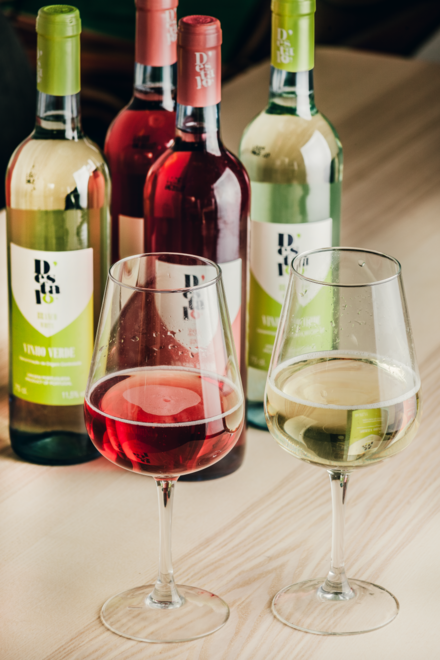

## Research Question

__Can we predict the quality of the wine (on a scale from 1-10) and the variants of wine (white vs red) based on various physio-chemical features?__

We will explore the data and use a linear regression model using multiple features to predict the quality of wine and use a decision tree classifier model and K nearest neighbors model to predict the type of wine.

  

## Data Description

We combined two data sets on the variants of Portuguese "Vinho Verde" red and white wine. The data was collected at an official testing site and determined the quality of the wine. These data sets can be found on Kaggle and the UCI Machine Learning Repository.

* Machine Learning Repository: 
https://archive.ics.uci.edu/ml/datasets/wine+quality,

We used the red and white datasets found on Kaggle. 

* Red Wine Dataset: 
https://www.kaggle.com/atharvachute/wine-quality-dataset

* White Wine Dataset: 
https://www.kaggle.com/piyushagni5/white-wine-quality?select=winequality-white.csv


## Data Cleaning

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import scipy
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

We have 2 datasets for wines. One dataset only contains data for white wine and the other has data for red wine. We are going to combine the two dataframes, so we have a dataframe that has information for both white and red wine data, with their types labeled in a column. 

### White wine data

We imported the white wine data and cleaned the dataframe. 

In [2]:
raw_white = pd.read_csv('winequality-white.csv', sep = ';')
raw_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Below we appended a column for the type of wine. Since it is all white wine, each entry will read "white".

In [3]:
raw_white['type'] = 'white'
raw_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


We replaced all spaces in the column names with underscores. 

In [4]:
## replacing spaces with underscores
white_colnames = []
for i in raw_white.columns:
    white_colnames.append(i)

white = raw_white.copy()
for i in range(len(white_colnames)):
    white_colnames[i] = white_colnames[i].replace(' ', '_')
        
white.columns = white_colnames
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [5]:
white.shape

(4898, 13)

The white wine data has 4898 rows and 13 columns. 

### Red wine data

We repeated this for the red wine data and then combined the two dataframes with the appended type columns together. 

In [6]:
raw_red = pd.read_csv('winequality_red.csv')
raw_red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
## appending 'type' column
raw_red['type'] = 'red'
raw_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
## changing red wine column names
red = raw_red.copy()
red.columns = white_colnames
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
red.shape

(1599, 13)

The red wine data has 1599 rows and 13 columns.

Below we are joining the datasets so the new dataframe has both red and white wine data.

In [10]:
wine_data = red.append(white)
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


The red wine data set has 1599 rows.

## Exploratory Data Analysis 

In this section we explored the data in the dataframe looked at the features' correlations with quality, as well as the features' relationship to each type of wine.

In [11]:
wine_data.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


These are basic summary statistics for our dataframe. 

In [12]:
wine_data.shape

(6497, 13)

Our data has 6497 rows and 13 columns.

### Distribution of Quality 

Text(0,0.5,'Density')

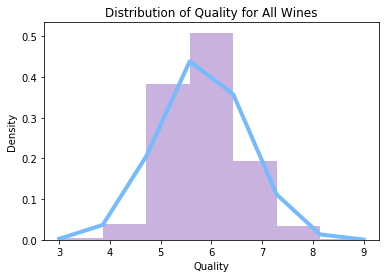

In [13]:
# plt.hist(wine_data["quality"], bins = 7, density = 1)
_, bins, _ = plt.hist(wine_data["quality"], 7, density = 1, color = 'tab:purple', alpha = 0.5)
mu, sigma = stats.norm.fit(wine_data["quality"])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, linewidth = 4, color = 'xkcd:sky blue')
plt.title("Distribution of Quality for All Wines")
plt.xlabel("Quality")
plt.ylabel("Density")

The quality is centered around the middle values. This makes sense since most wines would be average. There are less likely to be extreme values with wines that are terrible and have extremely low scores below 3, and wines that have perfect quality of 9 and above. This is demonstrated by the data. 

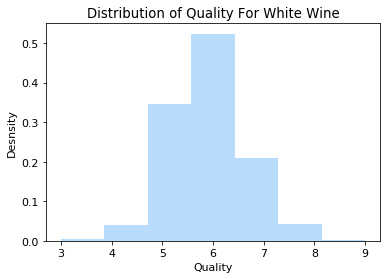

In [93]:
x = red['quality']
y = white['quality']

y_plot = plt.hist(y, 7, density = 1, alpha=0.5, label='white', color = 'xkcd:sky blue')
# plt.hist(x, 6, density = 1, alpha=0.5, label='red', color = 'xkcd:sky blue')
plt.title('Distribution of Quality For White Wine')
plt.xlabel('Quality')
plt.ylabel('Desnsity')
plt.show()


The original distribution graph looks very similar to the white wine histogram. This is most likely due to the fact that white wine has double the number of entries than red wine. 

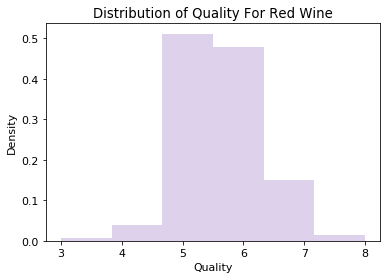

In [94]:
plt.hist(x, 6, density = 1, alpha=0.3, label='red', color = 'tab:purple')
plt.title('Distribution of Quality For Red Wine')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()


The red wine histogram shows a center between 5 and 6. The quality score 5 has reaches higher than the white wine. This is different from the white wine distribution. Additionally, there is a smaller spread, since there are no values that reach 9. 

### Heatmap 

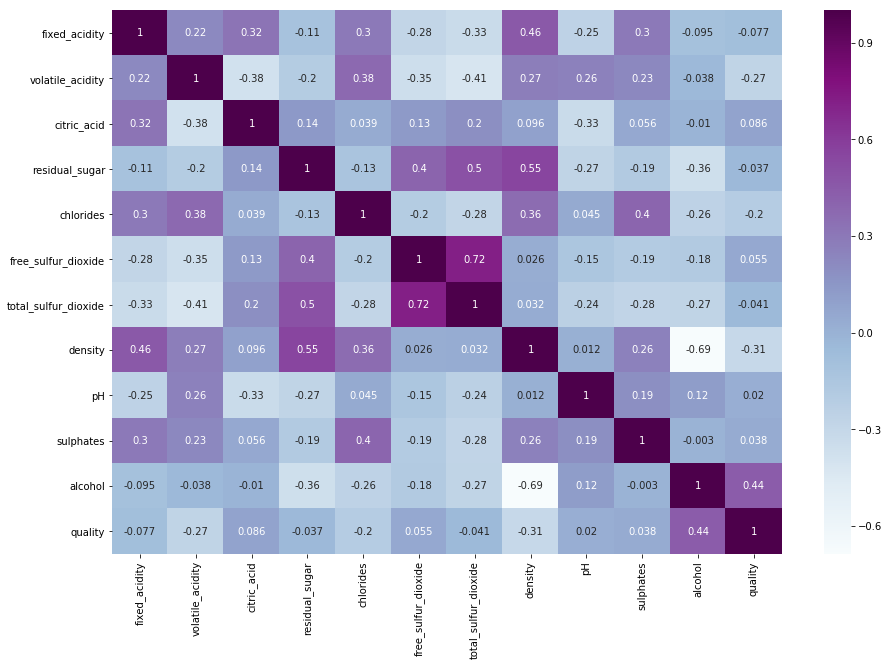

In [16]:
corr = wine_data.corr()
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, annot = True, cmap="BuPu")
plt.show()

Analyzing the heatmap, the columns that seem to have the best correlation with quality are chlorides, volatile acidity, density, and alcohol. The other features do not seem to have high correlation.

### Chlorides, volatile acidity, density, and alcohol 

We looked closer at the features that had a higher correlation with quality. 

In [17]:
names = ['chlorides', 'volatile_acidity', 'density', 'alcohol']

for i in range(len(names)): 
    print(names[i])
    print("Correlation with Quality: ", wine_data['quality'].corr(wine_data[names[i]]))
    print("Covariance with Quality: ", wine_data['quality'].cov(wine_data[names[i]]))
    print('\n')

chlorides
Correlation with Quality:  -0.20066550043510192
Covariance with Quality:  -0.006139015255051403


volatile_acidity
Correlation with Quality:  -0.2656994776114679
Covariance with Quality:  -0.038199525917987184


density
Correlation with Quality:  -0.30585790606941354
Covariance with Quality:  -0.0008009216563148506


alcohol
Correlation with Quality:  0.4443185200076541
Covariance with Quality:  0.46277632092985693




We printed out each features' correlation and covariance with quality. While each feature has a higher correlation with the quality than other features, the correlations are all moderately weak. Chlorides, volatile acidity, and density seem to have a negative relationship with quality, and alcohol content has a positive relationship with quality. Overall, the covariances with quality are low, meaning the quality and features do not change much together as the other changes. 

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays 

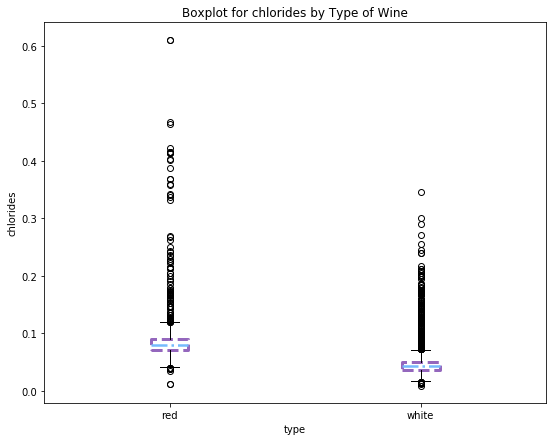

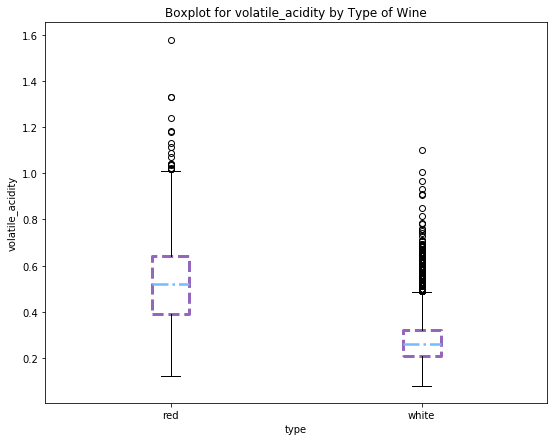

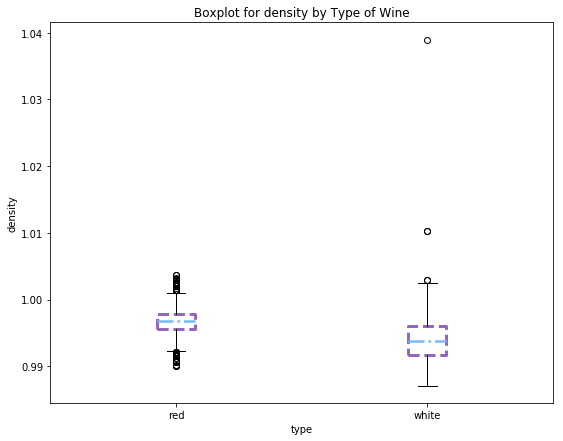

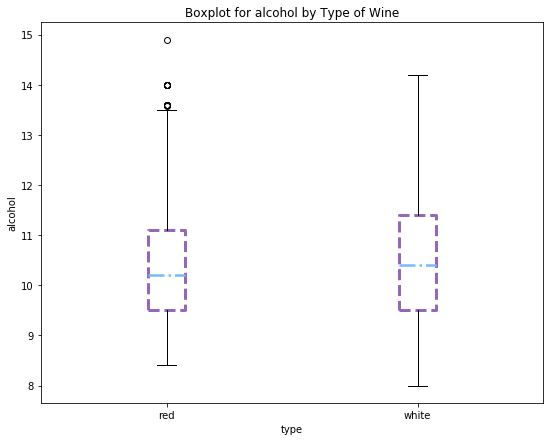

In [18]:
boxprops = dict(linestyle='--', linewidth=3, color='tab:purple')
medianprops = dict(linestyle='-.', linewidth=2.5, color= 'xkcd:sky blue')

for i in names: 
# chloride_dict = {'red': red['chlorides'], 'white': white['chlorides']}
# fig, ax = plt.subplots(figsize = (9, 7))
# ax.boxplot(chloride_dict.values())
# ax.set_xticklabels(chloride_dict.keys())

    var_dict = {'red': red[i], 'white': white[i]}
    fig, ax = plt.subplots(figsize = (9, 7))
    ax.boxplot(var_dict.values(), boxprops = boxprops, medianprops = medianprops)
    ax.set_xticklabels(var_dict.keys())
    plt.xlabel('type')
    plt.ylabel(i)
    plt.title('Boxplot for ' + i + ' by Type of Wine')



We created boxplots for the four features and separated them by red and white wine to look at the distributions. Most of the distributions are similar spread and median. Red wine seems to have a higher volatile acidity center than white wine. In addition, for chlorides, both red and white wine have a lot of outliers.

### Comparing Wine Type

In this section we compare the means of features based on wine type. We look at which features are different between red and white wine.

The data is split between features measured above 1 and below 1. Since volatile acidity, citric acid, density, chlorides, and sulphates are measured one, they are too small to see on the same graph as the other features. The first graph has all the other features and the second graph has the features below 1. 

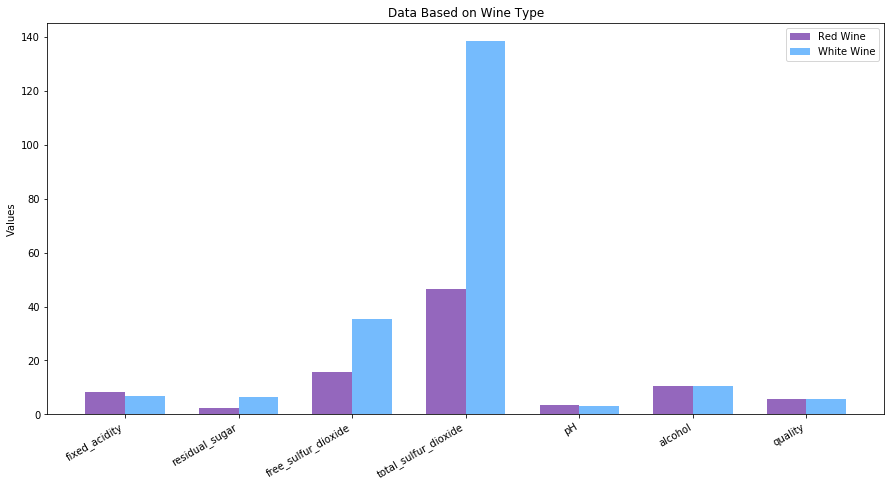

In [20]:
labels = ['fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'alcohol', 'quality']

red_means = []
for i in range(len(labels)): 
    mean = red[labels[i]].mean()
    red_means.append(mean)
    
white_means = []
for i in range(len(labels)): 
    mean = white[labels[i]].mean()
    white_means.append(mean)
x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots(figsize = (15, 8))
red_bar = ax.bar(x - width/2, red_means, width, label='Red Wine', color = 'tab:purple')
white_bar = ax.bar(x + width/2, white_means, width, label='White Wine', color = 'xkcd:sky blue')

ax.set_ylabel('Values')
ax.set_title('Data Based on Wine Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.rcParams.update({'font.size': 20})
plt.gcf().autofmt_xdate()


The bar graph shows that white wine has higher sulfur content than red wine. Since free sulfur dioxide is most likely related to total sulfur dioxide, we look at total sulfur dioxide. The total sulfur dioxide in white wine looks three times higher than the content in red wine. 

##### Data measured below 1

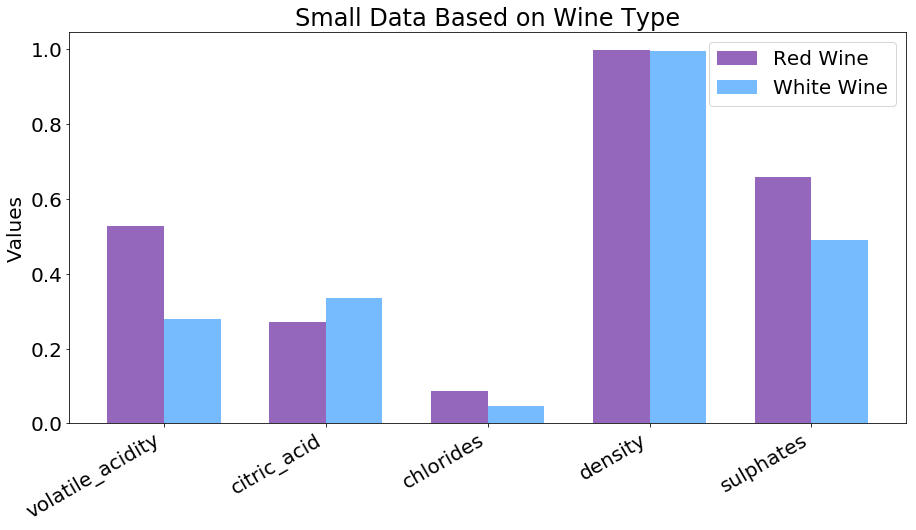

In [21]:
labels2 = ['volatile_acidity', 'citric_acid', 'chlorides', 'density', 'sulphates']
red_means2 = []
for i in range(len(labels2)): 
    mean = red[labels2[i]].mean()
    red_means2.append(mean)
    
white_means2 = []
for i in range(len(labels2)): 
    mean = white[labels2[i]].mean()
    white_means2.append(mean)

x = np.arange(len(labels2))
width = 0.35 

fig, ax = plt.subplots(figsize = (15, 8))
red_bar = ax.bar(x - width/2, red_means2, width, label='Red Wine', color = 'tab:purple')
white_bar = ax.bar(x + width/2, white_means2, width, label='White Wine', color = 'xkcd:sky blue')

ax.set_ylabel('Values')
ax.set_title('Small Data Based on Wine Type')
ax.set_xticks(x)
ax.set_xticklabels(labels2)
ax.legend()
plt.rcParams.update({'font.size': 20})
plt.gcf().autofmt_xdate()



There seem to be more differences here. Volatile acidity, citric acid, chlorides, and sulphates are differ between red and white wine. Volatile acidity, chlorides, and sulphates are higher in red wine than white wine. Citric acid content is higher in white wine than red wine.

Since total sulfur dioxide was so different between the two types of wine, we looked further at the distribution of total sulfur dioxide by wine in the violin plot below. 

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


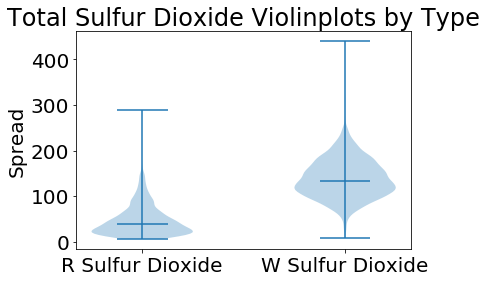

In [22]:
plt.violinplot([red['total_sulfur_dioxide'], white['total_sulfur_dioxide']], showextrema=True, showmedians=True)

plt.title('Total Sulfur Dioxide Violinplots by Type')
plt.xticks([1,2], ['R Sulfur Dioxide', 'W Sulfur Dioxide'])
plt.ylabel('Spread')
plt.rcParams.update({'font.size': 11})

plt.show()

Based on the plots, white wine has a higher center, and wider spread. The maximum reaches higher than 400, whereas the red content maximum reaches around 300. Most of the density for each one is around the center. 

In [23]:
## mean, std, num observations red 
tsd_red_mean = red['total_sulfur_dioxide'].mean()
tsd_red_std = red['total_sulfur_dioxide'].std()
num_red = len(red)

## mean, std, num obs white 
tsd_white_mean = white['total_sulfur_dioxide'].mean()
tsd_white_std = white['total_sulfur_dioxide'].std()
num_white = len(white)

print("Mean of sulfur dioxide in red wine: ", tsd_red_mean)
print("Standard deviation of sulfur dioxide in red wine: ", tsd_red_std)
print('\n')
print("Mean of sulfur dioxide in white wine: ", tsd_white_mean)
print("Standard deviation of sulfur dioxide in white wine: ", tsd_white_std)

Mean of sulfur dioxide in red wine:  46.46779237023139
Standard deviation of sulfur dioxide in red wine:  32.89532447829901


Mean of sulfur dioxide in white wine:  138.36065741118824
Standard deviation of sulfur dioxide in white wine:  42.49806455414294


The means are very different and the white wine mean has three times the amount of sulfur dioxide. 

## Models

Below we create models for our predictions. 

1. Linear Regression
2. Decision Tree
3. K Nearest Neighbors

### Linear Regression on All Wine Types

We created two different linear regression models examining different features to predict the quality of the wine. Both models examined both red and white wines together, as we did not separate the data. We examined the possibility of a difference in performance of models based on the type of wine in a later section.

In the first model, we simply looked at the features that we had identified earlier on to have the highest impact and correlation to predicting quality of wine, which were chlorides, volatile_acidity, density, and alcohol. We wanted to examine if having a model that only examined high correlation features would improve the performance of the model.

In [24]:
features = wine_data[['chlorides', 'volatile_acidity', 'density', 'alcohol']]
target = wine_data['quality']

quality_model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
quality_model.fit(x_train, y_train)

q_predictions = quality_model.predict(x_test)

quality_MSE = mean_squared_error(q_predictions, y_test)
print('quality MSE: ', quality_MSE)

q_score = quality_model.score(x_test, y_test)
print('quality score: ', q_score)
# q_accuracy = accuracy_score(y_test, q_predictions)
# print('accuracy for quality model: ', q_accuracy)


quality MSE:  0.5523329109637093
quality score:  0.252135475130539


In the next model below, we examined how the performance of a linear regression model is affected when all of the features, besides type, were inputted into the model. Since linear regression can only handle numerical data, and type of wine is categorical, we dropped the feature 'type' from the inputs.

In [25]:
X = wine_data.drop(columns=['quality', 'type'], axis=1)
target = wine_data['quality']

Xquality_model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)
Xquality_model.fit(x_train, y_train)

Xq_predictions = Xquality_model.predict(x_test)

Xquality_MSE = mean_squared_error(Xq_predictions, y_test)
print('quality MSE: ', Xquality_MSE)

Xq_score = Xquality_model.score(x_test, y_test)
print('quality score: ', Xq_score)

quality MSE:  0.546696441958058
quality score:  0.2597673129790169


Comparing the two linear regression models that examined all types of wine, 'quality_model' and 'Xquality_model', we were surprised to find that inputting all the features resulted in a better performing model, albeit if only by a little. A closer look at the correlation values revealed how while the four features selected in the beginning had the highest correlation, the correlation values were generally only moderately strong to begin with. Furthermore, with the score so low for both models, at around 0.25 and 0.26, it is evident that linear regression does not predict the quality of the wine well with the given features.

### Linear Regression based on Type of Wine


In this next section, we created two separate models that split the data into white and red wine data. We wanted to see if splitting the data by type of wine would improve the model, as in creating models more specific to the tyoe of wine as opposed to a general model. We again looked at the four most correlated features as inputs.

In [26]:

r_features = red[['chlorides', 'volatile_acidity', 'density', 'alcohol']]
r_target = red['quality']
w_features = white[['chlorides', 'volatile_acidity', 'density', 'alcohol']]
w_target = white['quality']



red_model = LinearRegression()
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(r_features, r_target, test_size=0.2, random_state=42)
red_model.fit(x_train_r, y_train_r)
white_model = LinearRegression()
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(w_features, w_target, test_size=0.2, random_state=42)
white_model.fit(x_train_w, y_train_w)



r_predictions = red_model.predict(x_test_r)
w_predictions = white_model.predict(x_test_w)

red_MSE = mean_squared_error(r_predictions, y_test_r)
print('red quality MSE: ', red_MSE)
white_MSE = mean_squared_error(w_predictions, y_test_w)
print('white quality MSE: ', white_MSE)

r_score = red_model.score(x_test_r, y_test_r)
print('red quality score: ', r_score)
w_score = white_model.score(x_test_w, y_test_w)
print('white quality score: ', w_score)

red quality MSE:  0.4168627692095477
white quality MSE:  0.5838991682850869
red quality score:  0.36211318807726234
white quality score:  0.24606917787347538


Looking at the score and MSE of the red wine model and white wine model, linear regression is better at predicting quality of wine for red wine as opposed to white wine. There is a lower MSE score for the red wine model as opposed to the white wine model, and the score for the red wine is higher in comparision to white wine model. This means that the red wine model predicts quality more accurately than white wine model.

### Classification Model: Decision Tree

We first create a decision tree model to predict the type of wine (white or red). We look at all the features in the dataframe (dropping "type" because it is what we are predicting).

In [97]:
X = wine_data.drop(["type"], axis = 1)
Y = wine_data["type"]

x_train_tree, x_test_tree, y_train_tree, y_test_tree= train_test_split(X, Y, test_size=0.2, random_state=42)
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train_tree,y_train_tree)

tree_pred_train = tree_model.predict(x_train_tree)
tree_pred_test = tree_model.predict(x_test_tree)

print("Decision Tree Train Accuracy:" , accuracy_score(y_train_tree, tree_pred_train))
print("Decision Tree Test Accuracy:" , accuracy_score(y_test_tree, tree_pred_test))


Decision Tree Train Accuracy: 0.9996151625938041
Decision Tree Test Accuracy: 0.9815384615384616


As seen, both of the train accuracy and test accuracy for the desicion tree model are very high. This means that the model is not underfitting or overfitting. It can give us relatively accurate results.

In [128]:
best_depth = 0
best_acc = 0
for x in range(1,12):
    tree_model = tree.DecisionTreeClassifier(max_depth=x)
    tree_model.fit(x_train_tree,y_train_tree)
    
    tree_pred_test = tree_model.predict(x_test_tree)
    current_acc = accuracy_score(y_test_tree, tree_pred_test)
    
    if (current_acc > best_acc):
        best_depth = x
        best_acc = current_acc
        
print("Best Decision Tree Depth:" , best_depth)
print("Best Decision Tree Test Accuracy:" , best_acc)

Best Decision Tree Depth: 7
Best Decision Tree Test Accuracy: 0.9823076923076923


To further fine tune our decision tree model, we can adjust the hyperparameter of the model, namely max_depth. This essentially allows us to control the maximum number of questions/decisions our tree has. It turns out that the depth of the tree that gives us the highest test accuracy is 7. It can potentially mean that only the 7 out of 11 features that we have are signifcant in deciding on the type of a wine. 

### Classification Model: K Nearest Neighbors

We then create a K nearest neighbors model. We use the same features as we did in the decision tree mdoel.

In [51]:
x_train_knn, x_test_knn, y_train_knn, y_test_knn= train_test_split(X, Y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_knn,y_train_knn)

knn_pred_train = knn_model.predict(x_train_tree)
knn_pred_test = knn_model.predict(x_test_tree)

print("KNN Train Accuracy:" , accuracy_score(y_train_knn, knn_pred_train))
print("KNN Test Accuracy:" , accuracy_score(y_test_tree, knn_pred_test))

KNN Train Accuracy: 0.9588223975370406
KNN Test Accuracy: 0.9461538461538461


Both of the train accuracy and test accuracy for our KNN model are pretty good (though not as good as those of the decision tree).

In [129]:
best_neighbors = 0
best_acc = 0
for x in range(1,20):
    knn_model = KNeighborsClassifier(x)
    knn_model.fit(x_train_knn,y_train_knn)
    
    knn_pred_test = knn_model.predict(x_test_knn)
    current_acc = accuracy_score(y_test_knn, knn_pred_test)
    
    if (current_acc > best_acc):
        best_neighbors = x
        best_acc = current_acc
        
print("Best Number of Neighbors:" , best_neighbors)
print("Best KNN Test Accuracy:" , best_acc)

Best Number of Neighbors: 1
Best KNN Test Accuracy: 0.9515384615384616


We further fine tune our KNN model by testing the number of neighbors we are considering. The number of neighbors that gives us the best test accuracy is 1. This could mean that the clusters for the two types of wine are very defined, so knowing only one wine that has the closest features can accurately predict the type of wine it is.

## Conclusion and Interpretation

Looking at all the models we created, it appears that while our classifiction models were able to perform very well in classifying the type of wine given various features, our logistic regression model is not as strong in predicting quality of wine accurately. 